## Solving One-Dimensional Optimization Problems

This Notebook introduces a detailed study of various algorithms for solving one-dimensional optimization problems. The classes of methods that have been discussed are: Elimination method, Interpolation method and Direct Root-Finding method. The Elimination method covers the Fibonacci Search method and the Golden Section Search method; the Interpolation method covers Quadratic Interpolation and Inverse Quadratic Interpolation methods; and the Direct Root Finding method covers Newton’s method, Halley’s method, Secant method and Bisection method. Finally, a combination of some of these methods, called Brent’s method, has also been discussed. Python programs involving the functions provided by the scipy.optimize module for solving problems using the above algorithms have also been provided. For the Fibonacci Search method and the Inverse Quadratic Interpolation method, full Python programs are provided.

### One-Dimensional Optimization Problems
The aim of this chapter is to introduce methods for solving one-dimensional optimization tasks, formulated in the following way:
\begin{equation}
    f(x^*)=\underset{x}{\min\ }f(x), x \in \mathbb{R} \tag{3.1}
\end{equation}
 
where, $f$ is a nonlinear function. The understanding of these optimization tasks and algorithms will be generalized in solving unconstrained optimization tasks involving objective function of multiple variables, in the future chapters.

### What is a Unimodal Function?

Definition 3.1 A function $f(x)$, where $\epsilon \in \mathbb{R}$  is said to be <i>unimodal</i> [refer to https://math.mit.edu/~rmd/465/unimod-dip-bds.pdf] if for a value $x^*$ on the real line, the following conditions are satisfied: $*  f$ is monotonically decreasing for $x \le v, * f$ is monotonically increasing for $x \ge v$, and $*$ if the above two conditions are satisfied, then $f(x^∗)$ is the minimum value of $f(x)$, and  $x^∗$ is the minimizer of $f$.
Let us have a look into the figure below.



We have taken the quadratic function of one variable: $f(x) = 5x^2 − 3x + 2$. It is a nonlinear unimodal function defined over the interval $[−2,2]$, denoted by the dotted lines on either side. The minimizer $x^∗ = 0.3$ (which can be solved analytically!), given by the middle dotted line, lies inside the interval $[x_l, x_r] = [−2, 2]$. We notice that $f(x)$ strictly decreases for $f(x) < f(x^∗)$ and strictly increases for $f(x) > f(x^∗)$.  The interval $[x_l,x_r]$ that has the minimizer within it, is called the interval of uncertainty and the goal of an optimization algorithm is to reduce this interval as much as possible to converge towards the minimizer. A good algorithm completes the convergence very fast. In each step of this reduction of the interval, the algorithm finds a new unimodal interval following the following procedures:

* Choose two new points, $x_1 \in [x_l, x^∗]$ and another point $x_2 \in [x^∗, x_r]$ (denoted by the two filled straight lines in the figure),
* If $f(x_2) > f(x_1)$, the new interval becomes $[x_l, x_2]$ and $x_r$ becomes $x_2$, i.e, $x_r = x_2$, Next pick a new $x_2$,
* If condition in step (2) is not satisfied, we set the new interval as $[x_1, x_r]$ directly after step (1) and set $x_l = x_1$, and
* Next pick a new $x_1$.
  
The given steps continue iteratively until the convergence is satisfied to a given limit of the minimizer. These class of methods is called an Elimination Method and we study two categories under this kind:

* <b>Fibonacci Search</b>, and
* <b>Golden Section Search</b>.

Rao’s book Engineering Optimization [Rao, Singiresu S. Engineering optimization: theory and practice. John Wiley & Sons, 2019.] also has some detailed studies on these kinds of optimization methods.

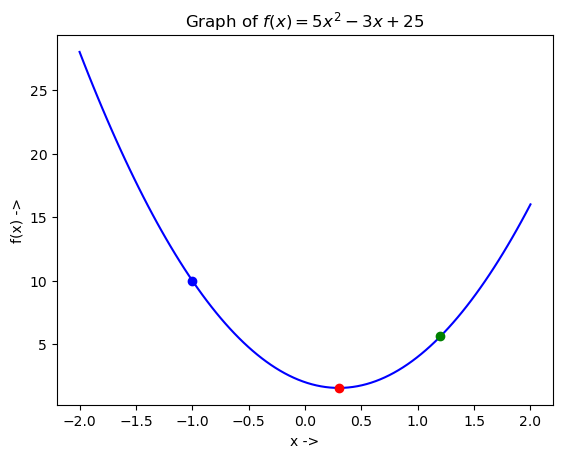

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def f(x): # Objective function
    return 5*x**2 - 3*x + 2

x = np.linspace(-2, 2, 100)
plt.title("Graph of $f(x) =  5x^2-3x+25$")
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.plot(x, f(x), 'b-')
plt.plot(0.3, f(0.3), 'ro-')
plt.plot(-1.0, f(-1.0), 'bo-')
plt.plot(1.2, f(1.2), 'go-')

### Fibonacci Search Method

Instead of finding the exact minimizer $x^∗$ of $f(x)$, the Fibonacci search strategy works by reducing the interval of uncertainty in every step, ultimately converging the interval, containing the minimizer, to a desired size as small as possible. One caveat is that, the initial interval containing, such that the interval lies in it, has to be known beforehand. However, the algorithm works on a nonlinear function, even if it is discontinuous. The name comes from the fact that the algorithm makes use of the famous sequence of Fibonacci numbers [http://oeis.org/A000045]. This sequence is defined in the following way:

\begin{align}
F_0&=0,F_1=1, \\ 
F_n&=F_{n-1} + F_{n-2},\text{, where }n=2,3,\ldots
\end{align}

We write a Python code to generate the first 16 Fibonacci numbers and display them as a table:

In [2]:
import pandas as pd
import numpy as np

def fibonacci(n): # define the  function
    fn = [0, 1,]
    for i in range(2, n+1):
        fn.append(fn[i-1] + fn[i-2])
    return fn

In [3]:
N = np.arange(16)
data = {'n': N, 'Fibonacci(n)': fibonacci(15)}
df = pd.DataFrame(data)

In [4]:
df

,n,Fibonacci(n)
0,0,0
1,1,1
2,2,1
3,3,2
4,4,3
5,5,5
6,6,8
7,7,13
8,8,21
9,9,34


Let $n$ be the total number of experiments to be conducted and $[x_l, x_r]$ be the initial interval the algorithm starts with. Let 
\begin{eqnarray}
L_0 = x_r - x_l \tag{3.2}
\end{eqnarray}

be the initial level of uncertainty and let us define,
\begin{eqnarray}
L_j = \frac{F_{n-2}}{F_n}L_0 \tag{3.3}
\end{eqnarray}
 
where, $F_{n−2}$ and $F_n$ are the $(n−2)^{th}$ and $n-th$ <i>Fibonacci numbers</i> respectively. We see from the formulation of the Fibonacci numbers that, (3.3) shows the following property:
\begin{equation}
    L_j = \frac{F_{n-2}}{F_n}L_0 \leq \frac{L_0}{2} \text{ for } n\geq 2 
\end{equation}

 
Now, the initial two experiments are set at points $x_1$ and $x_2$, where, $L_j = x_1 − x_l$ and $L_j = x_r − x_2$. So, combining these with Eq.(3.3), we have:
\begin{equation}
    x_1 = x_l + \frac{F_{n-2}}{F_n}L_0 \tag{3.4}
\end{equation}
 
and

\begin{equation}
    x_2 = x_r - \frac{F_{n-2}}{F_n}L_0 \tag{3.5}
\end{equation}

Now taking into consideration the unimodality assumption, a part of the interval of uncertainty is rejected, shrinking it to a smaller size, given by,
\begin{equation}
    L_i = L_0 - L_j = L_0(1-\frac{F_{n-2}}{F_n}) = \frac{F_{n-1}}{F_n}L_0 \tag{3.6}
\end{equation}
 
where, we have used the fact that, $F_n - F_{n-2} = F_{n-1}$ from the formulation of the Fibonacci numbers. This procedure leaves us with only one experiment, which, from one end, is situated at a distance of

\begin{equation}
  L_j = \frac{F_{n-2}}{F_n}L_0 = \frac{F_{n-2}}{F_{n-1}}L_i \tag{3.7}
\end{equation}
 
where, we have used Eq.(3.3). From the other end, the same experiment point is situated at a distance give by,

\begin{equation}
L_i-L_j = \frac{F_{n-3}}{F_n}L_0 = \frac{F_{n-3}}{F_n}L_0 = \frac{F_{n-3}}{F_{n-1}}L_2 \tag{3.8}
\end{equation}
 
where, we have again used Eq.(3.3). We now place a new experiment point in the interval $L_i$ so that both the present experiment points are situated at a distance given by Eq.(3.7). We again reduce the size of the interval of uncertainty using the unimodality conditions. This whole process is continued so that for the $k-th$ experiment point, its location is given by,
\begin{equation}
    L_{k[j]} = \frac{F_{n-k}}{F_{n-(k-2)}}L_{k-1} \tag{3.9}
\end{equation}
 
and the interval of uncertainty is given by,
\begin{equation}
    l_{k[i]} = \frac{F_{n-(k-1)}}{F_n}L_0 \tag{3.10}
\end{equation}
 
after $k$ iterations are completed. Now, the reduction ratio given by the ratio of the present interval of uncertainty after conduction $k$ iterations out of the $n$ experiments to be performed, $L_{l[i]}$ to the initial interval of uncertainty,  
\begin{equation}
    R = \frac{L_{k[i]}}{L_0} = \frac{F_{n-(k-1)}}{F_n} \tag{3.11}
\end{equation}

The purpose of this algorithm is to bring $R \sim 0$. The Python Function for Fibonacci Search Algorithm has been shown below:

In [5]:
def fib_search(f, xl, xr, n):
    F = fibonacci(n) # Call the fibonnaci number function
    L0 = xr - xl # Initial interval of uncertainty
    R1 = L0 # Initial Reduction Ratio
    Li = (F[n-2]/F[n])*L0 
    
    R = [Li/L0]

    for i in range(2, n+1):
        if Li > L0/2:
            x1 = xr - Li
            x2 = xl + Li
        else:
            x1 = xl + Li
            x2 = xr - Li
            
        f1, f2 = f(x1), f(x2)
        
        if f1 < f2:
            xr = x2
            Li = (F[n - i]/F[n - (i - 2)])*L0 # New interval of uncertainty
        elif f1 > f2:
            xl = x1
            Li = (F[n - i]/F[n - (i - 2)])*L0 # New interval of uncertainty
        else:
            xl, xr = x1, x2
            Li = (F[n - i]/F[n - (i - 2)])*(xr - xl) # New interval of uncertainty
            
        L0 = xr - xl
        R += [Li/R1,] # Append the new reduction ratio
        
    if f1 <= f2:
        return [x1, f(x1), R] # Final result
    else:
        return [x2, f(x2), R] # Final result

#### Example 1 
Let an objective function be:
\begin{equation}
    f(x) = x^5 - 5x^3 - 20x + 5 \tag{3.12}
\end{equation}
 
We will use the Fibonacci search algorithm to find the minimizer  $x^∗$, taking $n = 25$ and the initial interval of uncertainty $[−2.5, 2.5]$. Let’s write a Python function to define the given objective function and visualize the same:

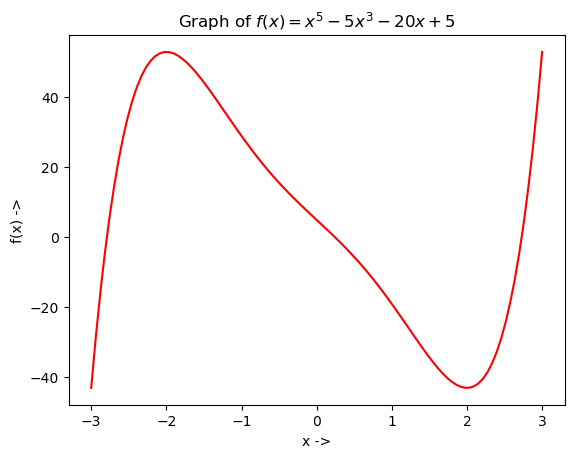

In [6]:
import matplotlib.pyplot as plt
def f(x): # Objective function
    return x**5 - 5*x**3 - 20*x + 5

x = np.linspace(-3, 3, 100)
plt.title("Graph of $f(x) =  x^5-5x^3-20x+5$")
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.plot(x, f(x), 'r-')

In [7]:
plt.show()

Now, we consider $n = 25$ and use the function ```fib_search(f, -2.5, 2.5, 25)``` to run the optimization and print the results:

In [8]:
Fib = fib_search(f, -2.5, 2.5, 25)
x_star, f_x_star, R = Fib
print ("x*:", x_star)
print ("f(x*):", f_x_star)

x*: 1.999966677774075
f(x*): -42.99999994448275


In [9]:
print ("Final Reduction Ratio:", R[-1])

Final Reduction Ratio: 0.0


We see that $x^∗ \sim 2$, $f(x^∗) \sim −43$ and the final Reduction Ration is 0. Now, to show the positions of $x^∗$ and $f(x^∗) on the graph of the objective function, we write the following code:

In [26]:
def fib_search(f, xl, xr, n):    
    F = fibonacci(n)
    L0 = xr - xl
    ini = L0
    Li = (F[n-2]/F[n])*L0
    
    R = [Li/L0]
    a = [xl]
    b = [xr]
    F1 = [f(xl)]
    F2 = [f(xr)]

    for i in range(2, n+1):
        #print("reduction ratio:", Li/ini)
        if Li > L0/2:
            x1 = xr - Li
            x2 = xl + Li
        else:
            x1 = xl + Li
            x2 = xr - Li
            
        f1, f2 = f(x1), f(x2)
        
        if f1 < f2:
            xr = x2
            Li = (F[n - i]/F[n - (i - 2)])*L0
        elif f1 > f2:
            xl = x1
            Li = (F[n - i]/F[n - (i - 2)])*L0
        else:
            xl, xr = x1, x2
            Li = (F[n - i]/F[n - (i - 2)])*(xr - xl)
            
        L0 = xr - xl
        R += [Li/ini,] 
        a += [xl, ]
        b += [xr, ]
        F1 += [f1, ]
        F2 += [f2, ]
        
    data = {'n' : range(0, n),
            'xl': a,
            'xr': b,
            'f(x1)': F1,
            'f(x2)': F2,
            'Reduction Ratio': R}

    df = pd.DataFrame(data, columns = ['n', 'xl', 'xr', 'f(x1)', 'f(x2)', 'Reduction Ratio'])
    return df

df = fib_search(f, -2.5, 3.0, 25)

In [27]:
df

,n,xl,xr,f(x1),f(x2),Reduction Ratio
0,0,-2.500000,3.000000,35.468750,53.000000,3.819660e-01
1,1,-0.399187,3.000000,13.291655,-16.031041,3.819660e-01
2,2,0.899187,3.000000,-16.031041,-39.401475,2.360680e-01
3,3,1.701626,3.000000,-39.401475,-40.763072,1.458980e-01
4,4,1.701626,2.504065,-40.763072,-25.135207,9.016994e-02
5,5,1.701626,2.197561,-42.996676,-40.763072,5.572809e-02
6,6,1.891056,2.197561,-42.450426,-42.996676,3.444185e-02
7,7,1.891056,2.080487,-42.996676,-42.657424,2.128624e-02
8,8,1.963412,2.080487,-42.934763,-42.996676,1.315561e-02
9,9,1.963412,2.035768,-42.996676,-42.934414,8.130623e-03


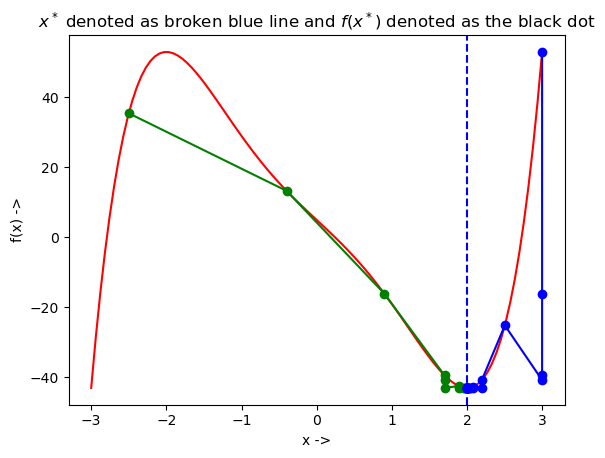

In [29]:
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x), 'r-')
plt.plot(df['xl'], df['f(x1)'], 'go-')
plt.plot(df['xr'], df['f(x2)'], 'bo-')
plt.axvline(x=x_star, color='b', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("$x^*$ denoted as broken blue line and $f(x^*)$ denoted as the black dot")
plt.show()

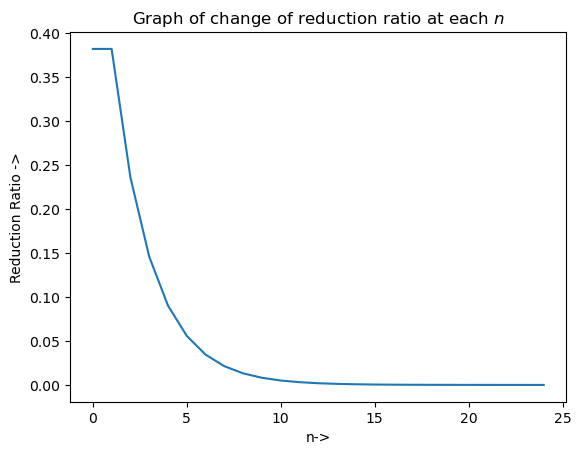

In [13]:
plt.xlabel("n->")
plt.ylabel("Reduction Ratio ->")
plt.title("Graph of change of reduction ratio at each $n$")
plt.plot(range(0, len(df)), df['Reduction Ratio'])
plt.show()

### Golden Section Search Method

The golden section search method is a modified version of the Fibonacci search method. One advantage of the former over the later is that, we do not need to keep a record of the total number of experiment points $n$ beforehand. While selecting $x_1$ and $x_2$  inside the interval of uncertainty, we make use of the golden ratio, $\phi = \frac{\sqrt{5}-1}{2}$ which is the positive root of the quadratic equation given by:

\begin{equation}
    \phi^2+\phi-1=0 \tag{3.13}
\end{equation}


Given the initial interval $[x_l, x_r]$, we have the initial interval of uncertainty as,
\begin{equation}
L_0 = x_r - x_l \tag{3.14}
\end{equation}

The new interior points $x_1$ and $x_2$ are chosen in such a way that both of them lies at a distance $\phi_2L_0$ from either side, i.e,
\begin{equation}
    x_1-x_l = \phi^2L_0 \tag{3.15}
\end{equation}
 
and
\begin{equation}
    x_r-x_2 = \phi^2L_0 \tag{3.16}
\end{equation}

Now from Eq.(3.13) we know
\begin{equation}
    L_0 = (\phi^2 + \phi)L_0 \tag{3.17}
\end{equation}

The above computations leave us with:
\begin{equation}
x_r - x_1 = \phi L_0 \tag{3.18}
\end{equation}
 
and
\begin{equation}
    x_2 - x_l = \phi L_0 \tag{3.19}
\end{equation}

Given, $f(x)$ is the nonlinear objective function, we now check whether $f(x_1) > f(x_2)$. If this is the case, we set $x_l = x_1$, otherwise if  
$f(x_1) > f(x_2)$, we set $x_r = x_2$. The new interval of uncertainty is set to be $L_i = \phi L_0$ and the previous interval is shrunk. This process of choosing new experimental points and shrinking the interval of uncertainty is continued until the termination condition is satisfied. The termination condition is to check whether the interval of uncertainty is less than a particular tolerance $\epsilon$ usually provided by the user. 

#### Example 2 
Let us consider an objective function:
\begin{equation}
    f(x) = \frac{1}{16}x^3 - \frac{27}{4}x \tag{3.20}
\end{equation}

We will use the golden section search method to find the minimizer $x^∗$ of this function and compute $f(x^∗)$. Suppose the initial interval be $[−10, 10]$ and the tolerance for the termination condition for the algorithm be $\epsilon$ = 10^−5$. Let us first define the function in Python:

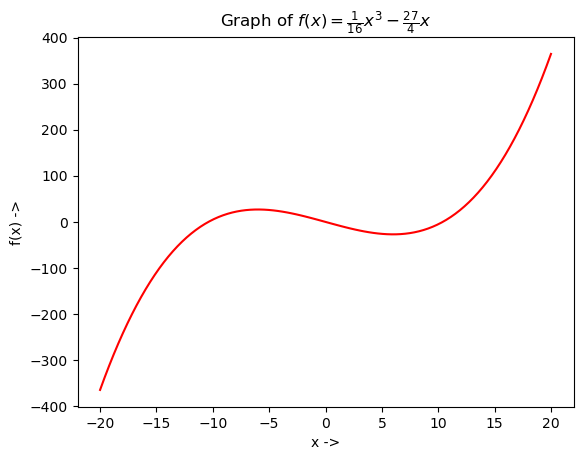

In [30]:
def f(x): # objective function
    return x**3/16 - 27*x/4

x = np.linspace(-20, 20, 100)
plt.plot(x, f(x), 'r-')

plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) = \\frac{1}{16}x^3 - \\frac{27}{4}x$")
plt.show()

For tackling this problem, we will not write our own Python function. As already stated in the last chapter, the scipy.optimize package too equips us with solvers to solve these tasks. For this problem, we use the ```minimize_scalar()``` function provided by [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), which is used for minimization of a scalar function of one variable.

Now returning back to our example, we have $f(x)$ defined by Eq.(3.20), we use the golden section search method to find its minimizer. Using the ```minimize_scalar()``` function and setting parameters ```method = 'golden', bounds = (-10, 10) and tol = 10**-5 ``` we can get our solution. We see that the initial interval has been set to $[−10, 10]$ and the tolerance $\epsilon$ has been set $10^{−5}$.  The Python code is provided below:

In [31]:
# Callback function to print the solution at each iteration
def callback(xk):
    print(f"Current solution: {xk}")

In [32]:
from scipy.optimize import minimize_scalar
from scipy.optimize import show_options
#show_options(solver="minimize")
result = minimize_scalar(f, method = 'golden', tol = 10**-5, options={'disp':3,'return_all':True})
print(result)

 
 Func-count       x           f(x)    
     7         7.45716      -24.4179  
     8         5.60878      -26.8316  
     9         5.60878      -26.8316  
     10         6.3148      -26.8866  
     11         6.3148      -26.8866  
     12        6.04512      -26.9977  
     13        6.04512      -26.9977  
     14        6.04512      -26.9977  
     15        5.98146      -26.9996  
     16        5.98146      -26.9996  
     17        6.00578        -27     
     18        6.00578        -27     
     19        5.99649        -27     
     20        5.99649        -27     
     21        6.00004        -27     
     22        6.00004        -27     
     23        6.00004        -27     
     24        6.00004        -27     
     25        6.00004        -27     
     26        6.00004        -27     
     27        6.00004        -27     
     28        6.00004        -27     
     29        5.99996        -27     
     30        5.99996        -27     
     31        5.99999 

C:\Users\chw\anaconda3\envs\IMSE685\lib\site-packages\scipy\optimize\_minimize.py:968: OptimizeWarning: Unknown solver options: return_all
  res = _recover_from_bracket_error(_minimize_scalar_golden,


We notice that $x^∗ ∼ 6$, $f(x^∗) ∼ −27$, the number of iterations it took to converge to $x^∗$ is 26 and other attributes that have been listed methodically. With some little extra Python codes, the user can also collect the data of the optimization steps, given below:

In [33]:
#for i in result.allvecs: print(i)
print(result.x)

5.99999150720724


The optimization steps can be plotted too. The graph with all the function evaluations along with the minimizer $f(x^∗) at $x^*$ has been denoted as a blue dotted line in the below figure which can be generated using the following Python code:

In [38]:
my_list2 = [7.45716,5.60878,5.60878,6.3148,6.3148,6.04512,6.04512,6.04512,5.98146,5.98146,6.00578,6.00578,5.99649,5.99649,6.00004,6.00004,6.00004,6.00004,6.00004,6.00004,6.00004,6.00004,5.99996,5.99996,5.99999,5.99999,]
df = pd.DataFrame(my_list2, columns=['x'])
df['f(x)'] = f(df['x'])
df

,x,f(x)
0,7.45716,-24.417895
1,5.60878,-26.831558
2,5.60878,-26.831558
3,6.31480,-26.886564
4,6.31480,-26.886564
5,6.04512,-26.997704
6,6.04512,-26.997704
7,6.04512,-26.997704
8,5.98146,-26.999614
9,5.98146,-26.999614


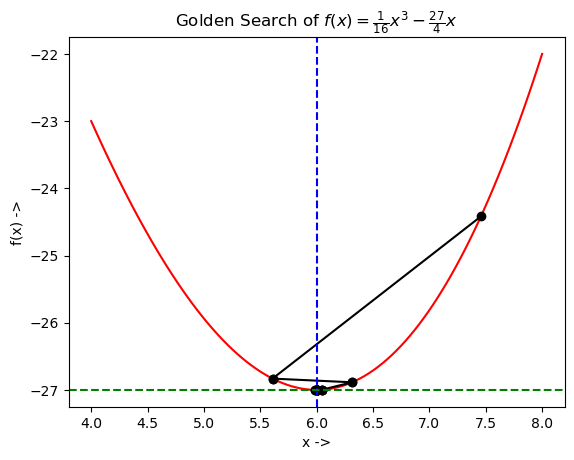

In [37]:
plt.plot(np.linspace(4, 8, 100), f(np.linspace(4, 8, 100)), 'r-')
plt.plot(df['x'], df['f(x)'], 'ko-')
plt.axvline(x=result.x, color='b', linestyle='--')
plt.axhline(y=result.fun, color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Golden Search of $f(x) = \\frac{1}{16}x^3 - \\frac{27}{4}x$")
plt.show()

If we analyse closely the optimization data in the dataframe and look at the third, fourth and fifth steps, we see that $f(x[3]) \sim −16.55, f(x[4]) \sim 120.1$ and again $f(x[5]) \sim −16.55$. This interesting overshooting can be also seen in the visualization given by the above figure.

We next discuss interpolation methods to find the minimum of a nonlinear unimodal objective function. This methods use polynomial approximation for modeling the objective function. We will study two methods under this class of methods:

* <b>Powell’s quadratic interpolation method</b>, and
* <b>Inverse quadratic interpolation method</b>

## Powell’s Quadratic Interpolation Method

Suppose, the objective function is $f(x)$, $x \in \mathbb{R}$ and the minimizer is $x^∗$. Powell’s method use successive quadratic interpolation curves for fitting to the objective function data. This gives a sequence of approximations to $x^*$, denoted by $x_t$.

Initially three data points $x_0, x_1, x_2 \in \mathbb{R}$ are provided. The interpolating quadratic polynomial through these data points $P(x)$ is as followed:
\begin{equation}
    P(x) = f(x_0) + (x - x_0)f[x_0, x_1] + (x-x_0)(x-x_1)f[x_0, x_1, x_2] \tag{3.21}
\end{equation}

where,

\begin{equation}
    f[x, y] = \frac{f(y) - f(x)}{y - x} \tag{3.22}
\end{equation}

 
is the first order forward divided difference, and
\begin{equation}
    f[x, y, z] = \frac{f[y, z] - f[x, y]}{z - x} \tag{3.23}
\end{equation}

 
is the second order forward divided difference. $x_t$ is the point where the slope of $P(x)$ curve is $0$ To find it, we set,
\begin{align}
& \frac{dP(x)}{dx} = 0 \\
&\Rightarrow f[x_0, x_1] + f[x_0, x_1, x_t](2x_t - x_0 - x_1) = 0 \tag{3.24}
\end{align}

 
So we end up with  
\begin{equation}
    x_t = \frac{f[x_0, x_1, x_2](x_0, x_1) - f[x_0, x_1]}{2f[x_0, x_1, x_2]} \tag{3.25}
\end{equation}

 
For $x_t$  to be minimum, the following condition regarding the second order forward divided difference should be satisfied,
\begin{equation}
    f[x_0, x_1, x_2] > 0 \tag{3.26}
\end{equation}

 

We can now say that $x_t$ is a good approximation to $x^∗$. 

#### Example 3.3 
Let us consider an objective function:
\begin{equation}
    f(x) = x^4 - 2x^2 + \frac{1}{4} \tag{3.27}
\end{equation}

 
We will use Powell’s quadratic interpolation method to find out the minimizer $x^∗$ and the function value at this point, $f(x^∗)$. Let the initial starting point be $x = 0.5$, the discrete step size be $s = 10^-3$, the maximum step size be $m = 30$ and the tolerance be $\epsilon = 10^-5$. To start with the optimization process, let us first define the objective function given by Eq.(3.27) in Python and plot the function:

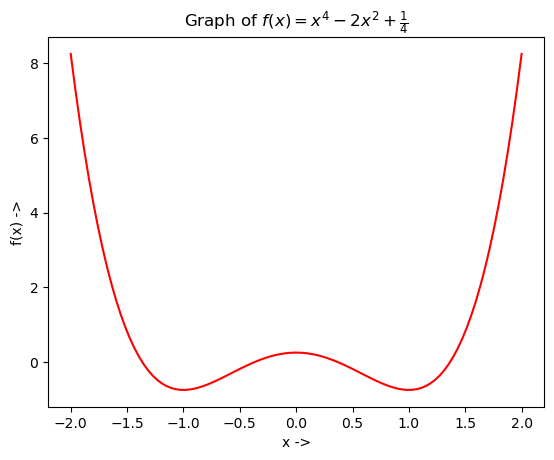

In [22]:
def f(x): # define the objective function
    return x**4 - 2*x**2 + 1/4
    
l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) =  x^4 - 2x^2 + \\frac{1}{4}$")
plt.show()

We will now write functions for the first order forward divided difference and the second order forward divided difference given by Eq.(3.22) and Eq.(3.22).

In [23]:
def f1(x, y): # First order forward divided difference
    return (f(y) - f(x)) / (y - x)

def f2(x, y, z): # Second order forward divided difference
    return (f1(y, z) - f1(x, y))/(z - x)

Next, we write a function to find out the nearest value to a number ```n``` from a list, ```seq``` and a function to find out the furthest value to a number ```n``` from a list, ```seq```.

In [24]:
def nearest_to(seq, n): # Picks the nearest value to a number entered from a list
    return min(seq, key = lambda x: abs(x - n))
                
def furthest_to(seq, n): # Picks the furthest value to a number entered from a list
    return max(seq, key = lambda x: abs(x - n))

Let us consider a list be $L = {1.1, 2.7, 3.3, 3.2, 1.8, −0.9, −0.5, −6.33}$  and a number be $0.7$, we need to find the nearest value to  
$0.7$ from $L$ and the furthest value to $0.7$ from $L$. We use the functions:

In [25]:
L = [1.1, 2.7, 3.3, 3.2, 1.8, -0.9, -0.5, -6.33]
n = 0.7

print("The nearest value to", n, "from ", L, ":", nearest_to(L, n))

The nearest value to 0.7 from  [1.1, 2.7, 3.3, 3.2, 1.8, -0.9, -0.5, -6.33] : 1.1


In [26]:
print("The furthest value to", n, "from ", L, ":", furthest_to(L, n))

The furthest value to 0.7 from  [1.1, 2.7, 3.3, 3.2, 1.8, -0.9, -0.5, -6.33] : -6.33


We now require to write a function that returns the element from a list that has the maximum value of $f(x)$ where $f$ is the objective function.

In [27]:
def maximum_fvalue(seq):
    fu = f(np.array(seq)) # Converts a Python list to a ndarray object 
    return seq[np.where(fu==np.amax(fu))[0][0]] # Picks up the index from the ndarray sequence, the element at which has the maximum f(x) value and returns the element from the sequence

Let us use the same sequence and find out the element from it that fas the maximum value of $f$,

In [28]:
L = [1.1, 2.7, 3.3, 3.2, 1.8, -0.9, -0.5, -6.33]
print(f(np.array(L))) # Prints the f(x)'s at all the x's from the sequence 

[-7.05900000e-01  3.88141000e+01  9.70621000e+01  8.46276000e+01
  4.26760000e+00 -7.13900000e-01 -1.87500000e-01  1.52562895e+03]


In [29]:
print(maximum_fvalue(L)) # Prints the element with the highest f(x) value

-6.33


We see that from the sequence $−6.33$ has the highest $f$ value, that is $f(−6.33) = 1.52562895 \times 10^3$ is the maximum value as can be seen in the printed ndarray. We finally write the function that implements **Powell’s Quadratic Interpolation Algorithm** and name it ```powell_quad()``` with the parameters ```x, s, m, and tol```:

In [30]:
def powell_quad(x, s, m, tol):
    if f(x) < f(x + s):
        x0 = x - s
        x1 = x
        x2 = x + s
    else:
        x0 = x
        x1 = x + s
        x2 = x + 2 * s

    L = [x0, x1, x2] # Set x0, x1 and x2
    XT = []  
    while True:
        M = f2(L[0], L[1], L[2])
        xt = (M * (L[0] + L[1]) - f1(L[0], L[1]))/(2 * M) # The approximate minimizer 
        xn = nearest_to(L, xt) # Picks the point from [x0, x1, x2] which is the nearest to xt
        xf = furthest_to(L, xt) # Picks the point from [x0, x1, x2] which is the furthest to xt
        if M > 0 and abs(xt - xn) > m: # Checks for equation 3.26 
            L.remove(xf) # Remove xf from [x0, x1, x2]
            value = min(L) + m 
            L += [value, ]
            L.sort() # Take a step of size m towards the direction of descent from the point with the lowest value
        elif M < 0 :
            L.remove(xn) # Remove xn from [x0, x1, x2]
            value = min(L) + m
            L += [value, ]
            L.sort() # Take a step of size m towards the direction of descent from the point with the lowest value
        else:
            # print((xt + xn) / 2, f((xt + xn) / 2)) # If the user wants to print the steps at all function evaluations at the approximate minimizers, uncomment the command
            XT += [(xt + xn) / 2, ]
            if abs(xt - xn) < tol: # Check for the terminating condition
                return [(xt + xn) / 2, f((xt + xn) / 2), XT] # Return the results
            else:
                mx = maximum_fvalue(L) 
                L.remove(mx)
                L += [xt, ]
                L.sort() # Replace the element from [x0, x1, x2] having the maximum function value with xt

Now returning back to our original example problem, we have $x = 0.5, s = 10^{−3}, m = 30$ and $\epsilon = 10^{−5}$. We will use these values as parameter values for our function ```powell_quad()``` and check the result:

In [31]:
res = powell_quad(0.5, 10**-3, 30, 10**-5)
x_star = res[0]
f_x_star = res[1]

print('x*:', x_star)

x*: 1.000000513307495


In [32]:
print('f(x*):', f_x_star)

f(x*): -0.7499999999989462


Now let us collect the optimization data and store in a dataframe ```df```:

In [33]:
XT = np.array(res[2])
F = f(XT)

data = {'xt': XT, 'f(xt)': F}
df = pd.DataFrame(data, columns=['xt', 'f(xt)'])
df

,xt,f(xt)
0,0.502141,-0.190714
1,0.502603,-0.191408
2,0.503155,-0.192237
3,0.503662,-0.192999
4,0.504191,-0.193796
...,...,...
179,0.978394,-0.748173
180,0.998358,-0.749989
181,0.999505,-0.749999
182,1.000036,-0.750000


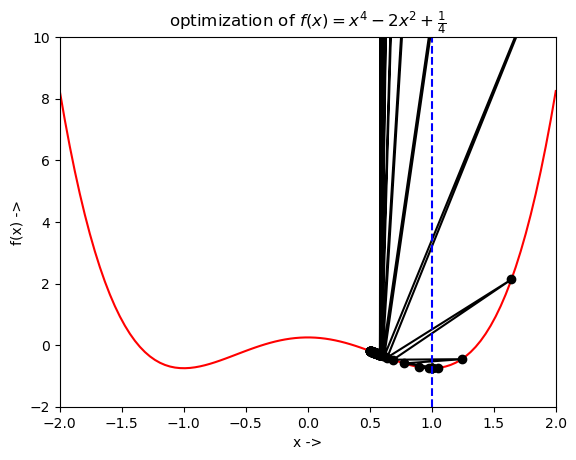

In [34]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(df['xt'], df['f(xt)'], 'ko-')
plt.axvline(x=x_star, color='b', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.xlim(-2, 2)
plt.ylim(-2, 10)
plt.title("optimization of $f(x) =  x^4 - 2x^2 + \\frac{1}{4}$")
plt.show()

We notice that the blue dashed line gives the position of $x^∗$ and the green dashed line gives the corresponding $f(x^∗) value.

In [35]:
res = powell_quad(-0.5, 10**-3, 10, 10**-5)
x_star = res[0]
f_x_star = res[1]

print('x*:', x_star)
print('f(x*):', f_x_star)

x*: -1.0000000470794883
f(x*): -0.7499999999999911


Now let us collect the optimization data and store in a dataframe ```df```:

In [36]:
XT = np.array(res[2])
F = f(XT)

data = {'xt': XT, 'f(xt)': F}
df = pd.DataFrame(data, columns=['xt', 'f(xt)'])
df

,xt,f(xt)
0,-0.505470,-0.195720
1,-0.512455,-0.206255
2,-0.518493,-0.215398
3,-0.525065,-0.225380
4,-0.531428,-0.235073
5,-0.537951,-0.245035
6,-0.544445,-0.254976
7,-0.551003,-0.265034
8,-0.557576,-0.275129
9,-0.564184,-0.285290


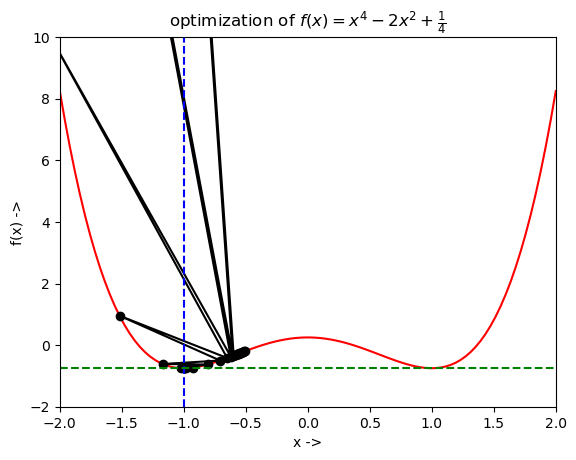

In [37]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(df['xt'], df['f(xt)'], 'ko-')
plt.axvline(x=x_star, color='b', linestyle='--')
plt.axhline(y=f_x_star, color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.xlim(-2, 2)
plt.ylim(-2, 10)
plt.title("optimization of $f(x) =  x^4 - 2x^2 + \\frac{1}{4}$")
plt.show()

We have $x^∗ \sim −1$ and $f(x^∗) \sim −0.75$, i.e, now the $x^∗$ converges to the local minimum on the left side.

### Inverse Quadratic Interpolation Method

The main motivation of using the inverse quadratic interpolation method [refer to An Introduction to Numerical Methods and Analysis by James F. Epperson] is to use the quadratic interpolation method to find the inverse of the objective function $f(x)$. This algorithm forms an integral part of the Brent’s method for optimization, which we will study later in this chapter. In this method, we have three initial points to start with, given by,  
$x_0, x_1, x_2 \in \mathbb{R}$. Our aim is to find the polynomial $q(f(x))$, such that,
\begin{equation}
    q(f(x_j)) = x_j \tag{3.28}
\end{equation}
which identifies,
\begin{equation}
    q = f^{-1} \tag{3.29}
\end{equation}

Now, using the divided difference forms we can write,
\begin{align}
    q(y) &= f^{-1}(y_0) + (y - y_0)\frac{f^{-1}(y_1) - f^{-1}(y_0)}{y_1 - y_0}\\ 
    &+ \frac{(y-y_0)(y-y_1)}{(y_2-y_0)}(\frac{f^{-1}(y_2) - f^{-1}(y_1)}{y_2 - y_1} - \frac{f^{-1}(y_1) - f^{-1}(y_0)}{y_1 - y_0})\\
    &= x_0 + (y-y_0) \frac{(x-x_0}{(y_1-y_0)}\\ &+\frac{(y-y_0)(y-y_1)}{(y_2-y_0)}(\frac{(x_2 - x_1)}{(y_2-y_1)} - \frac{(x_1-x_0)}{(y_1-y_0)}) \tag{3.30}
\end{align}

where,
\begin{equation}
    y_j = f(x_j) \tag{3.31}
\end{equation}

Now, the approximate minimizer $x_t$ is the value $q(0) = x_t$, i.e, at $y = 0$. Putting $y = 0$ in Eq.(3.30), we have,
\begin{equation}
    x_t = q(0) = x_0 - y_0 \frac{(x_1 - x_0)}{(y_1 - y_0)} + \frac{y_0y_1}{(y_2 - y_0)}(\frac{(x_2 - x_1)}{(y_2 - y_1)} - \frac{(x_1 - x_0)}{(y_1 - y_0)}) \tag{3.32}
\end{equation}

$x_t$ can be considered as a good approximate of $x^∗$ after satisfactory number of optimizations steps of the algorithm.

The above alogorithm looks very simple and it will be left as an exercise for the reader to implement this using Python. An objective function $f(x)$  can be selected to test the results using this algorithm. Let
\begin{equation}
    f(x) = 2 - e^x \tag{3.33}
\end{equation}
 
One can take the initial experimental point to be $x = 1$, the step size to be $s =10^{-5}$ and the tolerance to be $\epsilon = 10^{-8}$. \end{example}

In the next section we discuss two direct root finding methods:

* Newton’s method,
* Halley’s method,
* Secant Method, and
* Bisection Method

### Newton's Method

For a given objective function $f(x),x \in \mathbb{R}$, the necessary condition for it to contain a minimizer $x^∗$, is that $\frac{d}{dx}(x^*) = 0$. The aim of these direct root-finding methods is thus to obtain the solution of the equation,

\begin{equation}
    \frac{df}{dx}(x)=0 \tag{3.34}
\end{equation}

At point $x_j$, the Taylor’s expansion of the objective function, up to the second order terms is given by,
\begin{equation}
    f(x) = f(x_j) + (x - x_j)\frac{df}{dx}(x_j) + \frac{1}{2}(x - x_j)^2\frac{d^2f}{dx^2}(x_j) \tag{3.35}
\end{equation}

Now,
\begin{equation}
    \frac{df}{dx}(x_j) = 0 \tag{3.36}
\end{equation}
 
so, Eq.(3.35) reduces to
\begin{equation}
    f(x) = f(x_j) + \frac{1}{2}(x - x_j)^2\frac{d^2f}{dx^2}(x_j) \tag{3.37}
\end{equation}


Here $\frac{d^2 f}{dx^2}(x_j)$is a constant. Now, we find the derivative of Eq.(3.37) and set it to $0$ following Eq.(3.34)

\begin{align}
\frac{df}{dx}(x) &= 0 \\
\frac{df}{dx}(x_j) + (x - x_j)\frac{d^2f}{dx^2}(x_j) &= 0 \tag{3.38}
\end{align}

we get,
\begin{equation}
    x = x_j - \frac{\frac{df}{dx}(x_j)}{\frac{d^2f}{dx^2}(x_j)} \tag{3.39}
\end{equation}

$x_j$  denotes an approximation to the minimizer $x^∗$ of $f(x). An improved approximation in the form of an iterative process can be given using Eq.(3.39),
\begin{equation}
    x_{j+1} = x_j - \frac{\frac{df}{dx}(x_j)}{\frac{d^2f}{dx^2}(x_j)} \tag{3.40}
\end{equation}

The termination condition for convergence after a sufficient number of large iterations to $x^∗$ is given by:
\begin{equation}
    |\frac{df}{dx}(x_{j+1})| \leq \epsilon \tag{3.41}
\end{equation}

where, $\epsilon$ is the tolerance set by the user for the optimization algorithm. In numerical analysis literature, the Newton’s method is also sometimes called the Newton-Raphson method, because it was originally designed by Newton and was later improved by Raphson. The Newton’s method has a fast convergence property called the quadratic convergence.

Example 4 Let us consider the objective function, 

\begin{equation}
    f(x) = x^3 + x^2 - 1 \tag{3.52}
\end{equation}
 
We will use the Newton’s method to find the root $x^*$ of the objective function, along with the function value $f(x^∗)$ at this point. Let the initial experimental point of the iteration be $x_j = 2.0$ and the tolerance be $\epsilon = 10^{-6}$. In the algorithm aboave we see that we have to define two functions besides the objective function. They are ```fprime()``` for $\frac{df}{dx}$, i.e, the first derivative and ```fprime2()``` for $\frac{d^2f}{dx^2}, i.e, the second derivative. We will use the autograd package we discussed before, to define the derivative functions. Let us start with defining the objective function first:

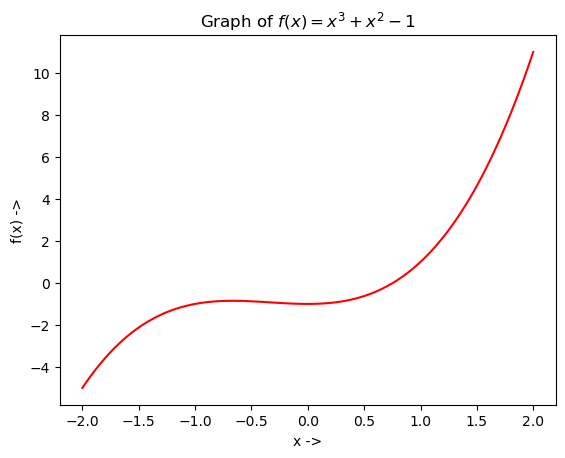

In [38]:
def f(x): # objective function
    return x**3 + x**2 -1

l = np.linspace(-2, 2, 100)
plt.plot(l, f(l), 'r-')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Graph of $f(x) =  x^3 + x^2 - 1$")
plt.show()

In [53]:
import autograd.numpy as np
from autograd import grad
from scipy import optimize
from scipy.optimize import line_search
NORM=np.linalg.norm

In [54]:
fprime = grad(f) # first derivative of f(x)
fprime2 = grad(fprime) # second derivative of f(x)

In [55]:
print(fprime(0.)) # first derivative of f(x) at point x=0
print(fprime2(0.75)) # second derivative of f(x) at point 0.75

-1.0
10.061668156377685


We see the root is approximately $0.75$, the convergence was successful and there have been $6$ iterations in the optimization process and the function has been evaluated $6$ times too.

In [56]:

def FP(x): # Returns the objective function, its first and second derivative at the point x
    return f(x), fprime(x), fprime2(x)
#def callback(x, f):
#    print(f"Iteration: x = {x}, f(x) = {f}")
sol = optimize.root_scalar(FP, x0=2., fprime=True, fprime2=True, xtol=10**-6, method='newton', options={'disp': True}) # The solver code, using the method = 'newton'
print(sol) # Prints the results

      converged: False
           flag: convergence error
 function_calls: 50
     iterations: 50
           root: 14.992729931420353
         method: newton


In [57]:
sol.iterations

50

The optimization steps can be plotted too. The graph with all the function evaluations along with the minimizer $f(x^∗)$ at $x^∗$  has been denoted as a blue dotted line in the below figure which can be generated using the following Python code:

Text(0.5, 1.0, 'optimization of $f(x) = x^3 + x^2 - 1$')

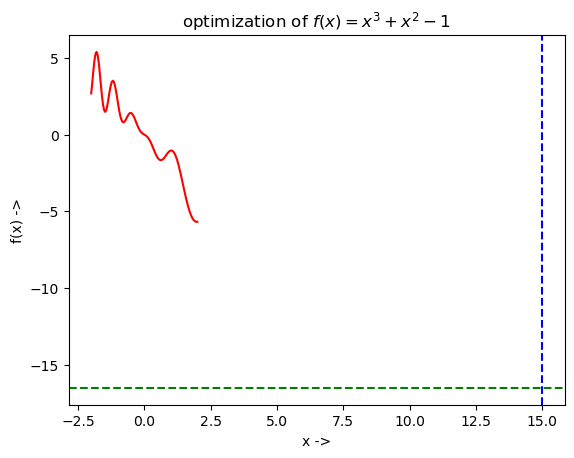

In [58]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
#plt.plot(df['x'], df['f(x)'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 + x^2 - 1$")

### Halley’s Method

For the objective function $f(x), x \in \mathbb{R}$, the necessary condition that the minimizer   $x^*$ exists is that $\frac{df}{dx}(x^*) = 0$. At point $x_j$, the Taylor’s expansion of the objective function upto the second order term is given by Eq. (3.35). A root of $f(x)$ satisfies $f(x) = 0$, so , we will have,
\begin{align}
    0 &= f(x_j) + (x - x_j)\frac{df}{dx}(x_j) + \frac{1}{2}(x - x_j)^2\frac{s^2f}{dx^2}(x_j) \nonumber \\
    &= f(x_j) + (x - x_j)[\frac{df}{dx}(x_j) +\frac{1}{2} (x - x_j)\frac{d^2f}{dx^2}(x_j)] \tag{3.53}
\end{align}

This gives,
\begin{equation}
    x - x_j = -\frac{f(x_j)}{\frac{df}{dx}(x_j) + \frac{1}{2}(x - x_j)\frac{d^2f}{dx^2}(x_j)} \tag{3.54}
\end{equation}

Now, using the fact from Newton’s iteration that,
\begin{equation}
    x - x_j = -\frac{f(x_j)}{\frac{df}{dx}(x_j)} \nonumber
\end{equation}

we can re-write Eq. (3.54) as,

\begin{align}
    x &= x_j - \frac{f(x_j)}{\frac{df}{dx}(x_j) - \frac{1}{2}\frac{f(x_j) \frac{d^2f}{dx^2}(x_j)}{\frac{df}{dx}(x_j)}} \nonumber \\
    &= x_j - \frac{2f(x_j)\frac{df}{dx}(x_j)}{2[\frac{df}{dx}(x_j)]^2 - f(x_j)\frac{d^2f}{dx^2}(x_j)} \tag{3.55}
\end{align}

The iterative method [ref, wolfram mathworld, Halley’s method] can be thus written as
\begin{equation}
    x_{j+1} = x_j - \frac{2f(x_j)\frac{df}{dx}(x_j)}{2[\frac{df}{dx}(x_j)]^2 - f(x_j)\frac{d^2f}{dx^2}(x_j)} \tag{3.56}
\end{equation}

The termination condition for convergence after a sufficient number of large iterations to $x^∗$ is given by:

\begin{equation}
    |\frac{df}{dx}(x_{j+1})| \leq \epsilon \tag{3.57}
\end{equation}

where, $\epsilon$ is the tolerance set by the user for the optimization algorithm. The <i>Halley’s</i> method has a fast convergence property called the <i>cubic convergence</i>.


#### Example 5 
Let us consider the objective function,
\begin{equation}
    f(x) = x^3 -6x^2+11x-6 \tag{3.66}
\end{equation}
 
We will use the Halley’s method to find the root $x^∗$ of the objective function, along with the function value $f(x^∗)$ at this point. Let the initial experimental point of the iteration be $x_0 = 3.7$ and the tolerance be $\epsilon = 10^{-6}$. We define the objective function, and its derivatives in the similar way in Python as we did for the Newton’s method

In [59]:
def f(x): # Objective function
    return x**3 - 6*x**2 + 11*x - 6

fprime = grad(f) # First derivative of the objective function
fprime2 = grad(fprime) # Second derivative of the objective function 

In [60]:
def FP(x): # Returns the objective function and its derivatives
    return f(x), fprime(x), fprime2(x)

sol = optimize.root_scalar(FP, x0=3.7, fprime=True, fprime2=True, xtol=10**-6, method='halley', options={'disp': True})
print(sol)

      converged: True
           flag: converged
 function_calls: 4
     iterations: 4
           root: 2.9999999999999996
         method: halley


In [61]:
#my_list =[-4,1.33333,1.23256,1.14205,-1.42897,-2.71449,-3.35724,-2.95064,-3.00219,-2.99994,-3,-3]
#my_list6 = [-1.5,1,-0.0134601,-0.000165079,-7.41E-07,-4.97E-13]
my_list5 =[3.7,3.11936,3.00207,3]
df = pd.DataFrame(my_list5, columns=['x'])
df['f'] = f(df['x'])
df

,x,f
0,3.70000,3.213000
1,3.11936,0.283161
2,3.00207,0.004153
3,3.00000,0.000000


Text(0.5, 1.0, 'Halley -- optimization of $f(x) = x^3 + x^2 - 1$')

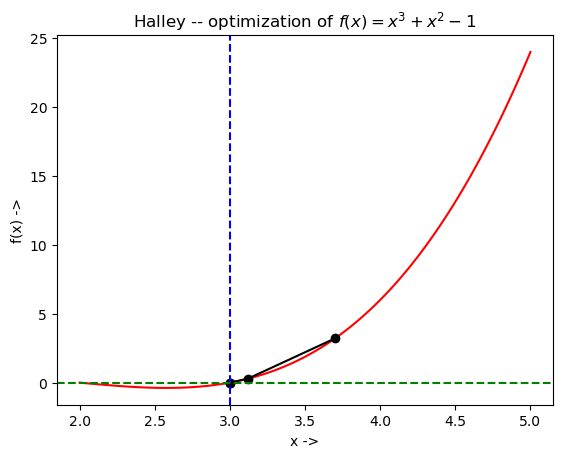

In [62]:
plt.plot(np.linspace(2, 5, 100), f(np.linspace(2, 5, 100)), 'r-')
plt.plot(df['x'], df['f'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("Halley -- optimization of $f(x) = x^3 + x^2 - 1$")

### Secant Method

The formulation of the secant method looks similar to that of (3.38).

\begin{equation}
\frac{df}{dx}(x_j) + s\frac{d^2f}{dx^2}(x_j) = 0 \tag{3.67}
\end{equation}

 

Where,$s$ is the slope of the line connecting the points $(a, \frac{df}{dx}(b))$ and $(b, \frac{df}{dx}(b))$ on the $x − \frac{df}{dx} plane.  
$a$ and $b$ are two different approximations to the root of the objective function. We know the equation for the slope,
\begin{align}
s = \frac{\frac{df}{dx}(b) - \frac{df}{dx}(a)}{b - a} \tag{3.68}
\end{align}

So, (3.67) can be written as:
\begin{eqnarray}
    x &-& x_j = -\frac{\frac{df}{dx}(x_j)}{s} \nonumber \\
    x &=& x_j - \frac{\frac{df}{dx}(a)(b - a)}{\frac{df}{dx}(b) - \frac{df}{dx}(a)} = a - \frac{\frac{df}{dx}(a)(a - b)}{\frac{df}{dx}(a) - \frac{df}{dx}(b)} \tag{3.69}
\end{eqnarray}


The iterative process, known as the secant method is thus given by,
\begin{equation}
    x_{j+1} = x_j - \frac{\frac{df}{dx}(x_j)(x_j - x_{j-1})}{\frac{df}{dx}(x_j) - \frac{df}{dx}(x_{j+1})} \tag{3.70}
\end{equation}

The secant of a curve is a line that intersects the curve at minimum of two distinct points. As $b \longrightarrow a$, the secant approaches $\frac{d^2 f}{dx^2}(a)$. Due to this reason, the secant method is also called the quasi-Newton method. The root $x^*$ lies between the points $a$ and $b$ if the following condition is satisfied:

\begin{equation}
    \frac{df}{dx}(a)\frac{df}{dx}(b) < 0 \tag{3.71}
\end{equation}

As we have seen, the iteration process demands two initial points to start with, i.e, $a$ and $b$. The iterates $x_j$ converges to the root of the objective function when $a$ and $b$ are close to the root. The order of convergence for the process is given by the number $\phi = \frac{\sqrt{5}+1}{2} \approx 1.618$, which is the golden ratio, i.e, the secant method has a superlinear convergence, unlike a quadratic or a cubic convergence.

### Example 6
Let us consider an objective function given by, 
\begin{equation}
    f(x) = x\cos(x^2 - 7x) - 2x \tag{3.72}
\end{equation}
 
We will find the root of this objective function, given the two starting points are $a = -1.5$ and $b = 1$ and the tolerance $\epsilon = 10^{-7}$.
The plot for this objective function can be generated in the following way:

In [63]:
def f(x): return x*np.cos(x**2-7*x)-2*x


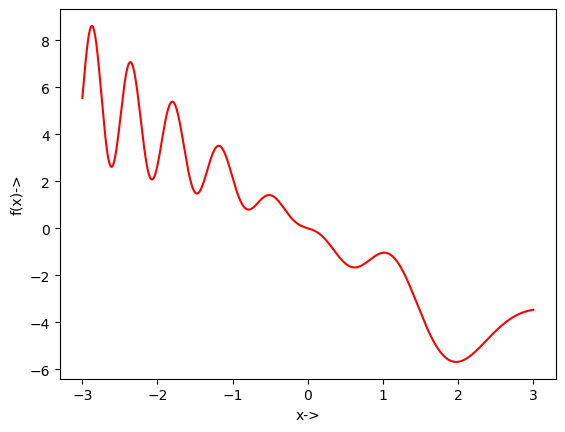

In [64]:
l = np.linspace(-3, 3., 1000)
plt.plot(l, f(l), 'r-')
plt.xlabel('x->')
plt.ylabel('f(x)->')
plt.show()

The corresponding $x − \frac{df}{dx}(x)$ plot is given below:

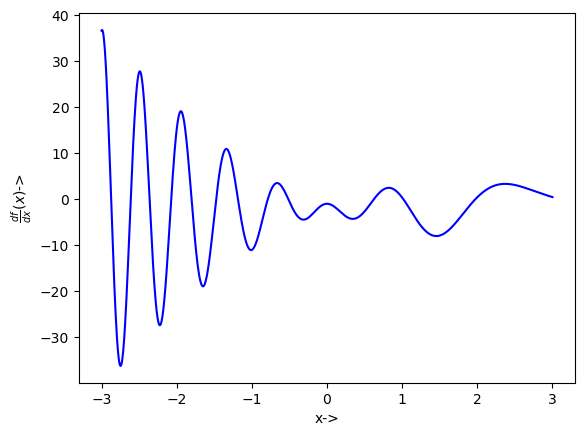

In [65]:
def f(x): return x*np.cos(x**2-7*x)-2*x
l = np.linspace(-3, 3., 1000)
G = grad(f)
h=[]
for i in l:
    h+=[G(i),]
h = np.array(h)
plt.plot(l, h, 'b-')
plt.xlabel('x->')
plt.ylabel('$\\frac{df}{dx}(x)$->')
plt.show()

The objective function and its first derivative can be defined in Python:

In [66]:
def f(x): # Objective function
    return x*np.cos(x**2 - 7*x) - 2*x
    
fprime = grad(f) # First derivative of the objective function

Now, the function that returns both the objective function and its first derivative at a particular point can be defined as:

In [67]:
def FP(x):
    return f(x), fprime(x)

We now write the solver code with the root_scalar() function where the parameters are set to be method='secant', $x_0=-1.5, x_1=1., xtol=10^{-7}$ and so on.

In [69]:
sol = optimize.root_scalar(FP, x0=-1.5, x1=1., fprime=True, xtol=10**-7, method='secant', options={'disp': True})
print(sol) # Print the solution results

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: -6.677327076928414e-24
         method: secant


In [70]:
#my_list =[-4,1.33333,1.23256,1.14205,-1.42897,-2.71449,-3.35724,-2.95064,-3.00219,-2.99994,-3,-3]
my_list6 = [-1.5,1,-0.0134601,-0.000165079,-7.41E-07,-4.97E-13]
df = pd.DataFrame(my_list6, columns=['x'])
df['f'] = f(df['x'])
df

,x,f
0,-1.500000e+00,1.525219e+00
1,1.000000e+00,-1.039830e+00
2,-1.346010e-02,1.352003e-02
3,-1.650790e-04,1.650791e-04
4,-7.410000e-07,7.410000e-07
5,-4.970000e-13,4.970000e-13


Text(0.5, 1.0, 'optimization of $f(x) = x\\cos(x^2 - 7x) - 2x$')

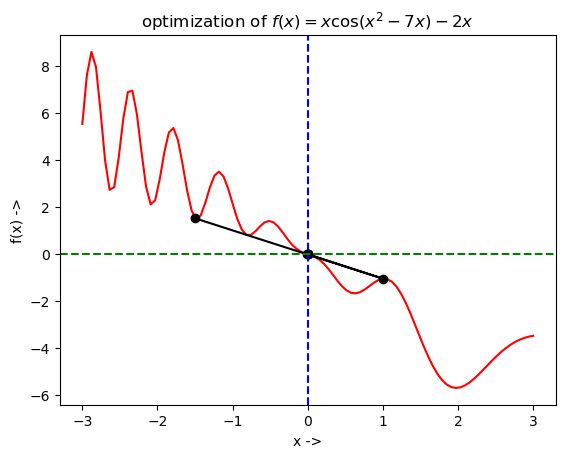

In [71]:
plt.plot(np.linspace(-3, 3, 100), f(np.linspace(-3, 3, 100)), 'r-')
plt.plot(df['x'], df['f'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x\cos(x^2 - 7x) - 2x$")

The corresponding $x − \frac{df}{dx}(x)$ plot is given below:

Text(0.5, 1.0, 'Visualizing the root and the $\\frac{df}{dx}(x)$ value')

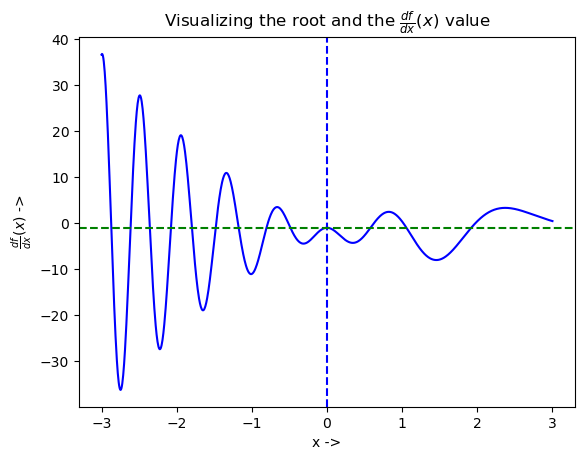

In [72]:
l = np.linspace(-3, 3., 1000)
G = grad(f)
h=[]
for i in l:
    h+=[G(i),]
h = np.array(h)
plt.plot(l, h, 'b-')
#plt.plot(df['x'], df["f'(x)"], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=G(f(sol.root)), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('$\\frac{df}{dx}(x)$ ->')
plt.title("Visualizing the root and the $\\frac{df}{dx}(x)$ value")

### Bisection Method

The bisection method starts with the continuous objective function with an initial interval provided, given by $[x_l, x_r]$ such that the root lies in between them and the following condition is satisfied:
\begin{equation}
    f(x_l)f(x_r) < 0 \tag{3.73}
\end{equation}

The method works by iteratively bisecting the interval and selecting the subinterval where Eq. (3.73) is satisfied for the newly chosen points. A new point $x_j \in [x_l, x_r]$ is chosen according to the following:
\begin{equation}
    x_j = \frac{x_l+x_r}{2} \tag{3.74}
\end{equation}

 
The bisection method forms an integral part of the Brent’s method for root finding, which we will be discussing in the next section.

#### Example 7 
Let us consider an objective function, given by,
\begin{equation}
    f(x) = x^3 - 2x - 2 \tag{3.75}
\end{equation}


We will find the root of this objective function using bisection method, given the initial interval is $[−1, 2]$ and the tolerance is $\epsilon = 10^{-7}$. Let us first define the objective function and its first derivative in Python:


In [73]:
def f(x):
    return x**3 - 2*x - 2

fprime = grad(f)

The solver code looks similar like the previous solver codes and is written as:

In [74]:
def FP(x):
    return f(x), fprime(x)

sol = optimize.root_scalar(FP, bracket=[-1., 2.], fprime=True, xtol=10**-7, method='bisect')
print(sol)

      converged: True
           flag: converged
 function_calls: 27
     iterations: 25
           root: 1.7692923843860626
         method: bisect


The plot of the optimization steps showing the convergence of the root, along with the root being denoted by the vertical broken blue line and its corresponding function value denoted by horizontal broken green line has been shown below:

In [75]:
my_list = [-1,2,0.5,1.25,1.625,1.8125,1.71875,1.76562,1.78906,1.77734,1.77148,1.76855,1.77002,1.76929,1.76965,1.76947,1.76938,1.76933,1.76931,1.7693,1.76929,1.76929,1.76929,1.76929,1.76929,1.76929,1.76929]
df = pd.DataFrame(my_list, columns=['x'])
df['f'] = f(df['x'])
df

,x,f
0,-1.00000,-1.000000
1,2.00000,2.000000
2,0.50000,-2.875000
3,1.25000,-2.546875
4,1.62500,-0.958984
5,1.81250,0.329346
6,1.71875,-0.360138
7,1.76562,-0.027072
8,1.78906,0.148188
9,1.77734,0.059826


Text(0.5, 1.0, 'optimization of $f(x) = x^3 - 2x - 2$')

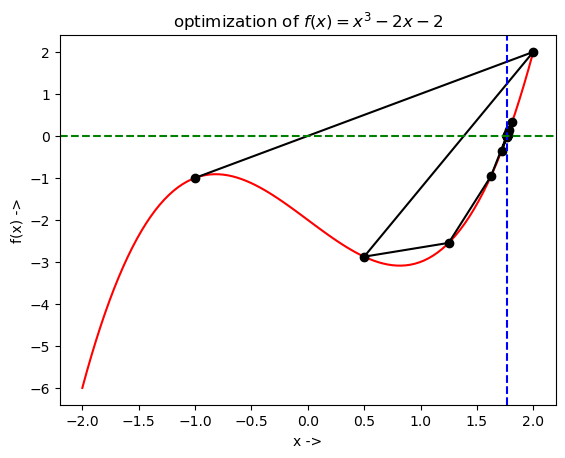

In [76]:
plt.plot(np.linspace(-2, 2, 100), f(np.linspace(-2, 2, 100)), 'r-')
plt.plot(df['x'], df['f'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 - 2x - 2$")

### Brent’s Method

Originally developed by van Wijngaarden, Dekker, and others, the root finding algorithm was later improved by Brent and is called Brent’s method or more originally, Van Wijngaarden-Dekker-Brent method. This algorithm takes into account the concepts from root bracketing, the bisection method and the inverse quadratic polynomial interpolation method. For the initial three points given by $a, b, c \in \mathbb{R}$, and the nonlinear objective function given by $f(x)$, we can write the interpolation formula [refer Press et al, numerical recipes] as,

\begin{align}
    x &=& \frac{(y - f(a))(y - f(b))c}{(f(c) - f(a))(f(c) - f(b))} + \frac{(y - f(b))(y-f(c))a}{(f(a) - f(b))(f(a) - f(c))} \nonumber \\
    &+& \frac{(y-f(c))(y-f(a))b}{(f(b) - f(c))(f(b) - f(a))} \tag{3.76}
\end{align}

If $y$ is set to $0$, the next root can be estimated. This can be written as,
\begin{equation}
    x = b + p/q \tag{3.77}
\end{equation}

where,
\begin{equation}
    p = s(t(r - t)(c - b) - (1-r)(b-a)) \tag{3.78}
\end{equation}
 
and
\begin{equation}
    q=(t-1)(r-1)(s-1) \tag{3.79}
\end{equation}

 
We have,
\begin{equation}
    r = \frac{f(b)}{f(c)} \tag{3.80}
\end{equation}

 

\begin{equation}
    s = \frac{f(b)}{f(a)} \tag{3.81}
\end{equation}

 
\begin{equation}
    t = \frac{f(a)}{f(c)} \tag{3.82}
\end{equation}

In Eq.(3.77), $b$ is the present best estimate of the root and $\frac{p}{q}$ is an infinitesimal correction. 

Example 3.8 Let an objective function be:
\begin{equation}
    f(x) = (x+3)(x-1)^2 \tag{3.83}
\end{equation}
 
We use Brent’s method for root finding to find the root of the objective function, given that, the initial interval is$[−4, 43]$ and the tolerance is $\epsilon = 10^{-7}$. At first we define the objective function in Python and then write the solver code where the parameter ```method='brentq'``` should be set for the ```root_scalar()``` function and then we print the result.

In [85]:
def f(x):
    return (x+3)*(x-1)**2

fprime = grad(f)

def FP(x):
    return f(x), fprime(x)
    
sol = optimize.root_scalar(FP, bracket=[-4., 4/3], fprime=True, xtol=10**-7, method='brentq')
print(sol)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: -3.000000000000003
         method: brentq


In [86]:
my_list8 =[-4,1.33333,1.23256,1.14205,-1.42897,-2.71449,-3.35724,-2.95064,-3.00219,-2.99994,-3,-3]
#my_list6 = [-1.5,1,-0.0134601,-0.000165079,-7.41E-07,-4.97E-13]
#my_list5 =[3.7,3.11936,3.00207,3]
df = pd.DataFrame(my_list8, columns=['x'])
df['f'] = f(df['x'])
df

,x,f
0,-4.00000,-25.000000
1,1.33333,0.481471
2,1.23256,0.228914
3,1.14205,0.083579
4,-1.42897,9.268912
5,-2.71449,3.939306
6,-3.35724,-6.782394
7,-2.95064,0.770389
8,-3.00219,-0.035078
9,-2.99994,0.000960


The plot of the optimization steps showing the convergence of the root, along with the root being denoted by the vertical broken blue line and its corresponding function value denoted by horizontal broken green line has been shown below:

Text(0.5, 1.0, 'optimization of $f(x) = x^3 - 2x - 2$')

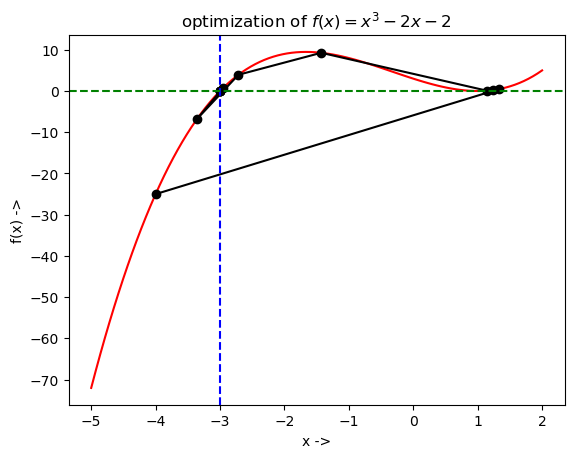

In [87]:
plt.plot(np.linspace(-5, 2, 100), f(np.linspace(-5, 2, 100)), 'r-')
plt.plot(df['x'], df['f'], 'ko-')
plt.axvline(x=sol.root, color='b', linestyle='--')
plt.axhline(y=f(sol.root), color='g', linestyle='--')
plt.xlabel('x ->')
plt.ylabel('f(x) ->')
plt.title("optimization of $f(x) = x^3 - 2x - 2$")